In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday2/colorectal-cancer-global-dataset-and-predictions")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/versions/1


In [3]:
cancer = pd.read_csv(f"{path}/colorectal_cancer_dataset.csv")
cancer.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
#предобработка
cancer['Gender']=cancer['Gender'].map({'F':1,'M':0})
cancer['Alcohol_Consumption']=cancer['Alcohol_Consumption'].map({'Yes':1,'No':0})
cancer['Smoking_History']=cancer['Smoking_History'].map({'Yes':1,'No':0})
cancer['Survival_Prediction']=cancer['Survival_Prediction'].map({'Yes':1,'No':0})
cancer['Insurance_Status']=cancer['Insurance_Status'].map({'Insured':1,'Uninsured':0})
cancer['Economic_Classification']=cancer['Economic_Classification'].map({'Developed':1,'Developing':0})
cancer['Urban_or_Rural']=cancer['Urban_or_Rural'].map({'Urban	':1,'Rural':0})
cancer['Mortality']=cancer['Mortality'].map({'Yes':1,'No':0})
cancer['Family_History']=cancer['Family_History'].map({'Yes':1,'No':0})
print(cancer)

        Patient_ID Country  Age  Gender Cancer_Stage  Tumor_Size_mm  \
0                1      UK   77       0    Localized             69   
1                2      UK   59       0    Localized             33   
2                3   Japan   66       0     Regional             17   
3                4     USA   83       0     Regional             14   
4                5  France   66       0    Localized             34   
...            ...     ...  ...     ...          ...            ...   
167492      167493     USA   69       0    Localized             49   
167493      167494     USA   79       1     Regional             29   
167494      167495     USA   74       0   Metastatic             62   
167495      167496      UK   68       1    Localized             35   
167496      167497  France   79       1   Metastatic             67   

        Family_History  Smoking_History  Alcohol_Consumption Obesity_BMI  ...  \
0                    0                0                    1  Over

In [5]:
#делим на X и Y
Y = cancer['Survival_Prediction']
X = cancer.drop(['Survival_Prediction','Country'],axis=1)
print(X)


        Patient_ID  Age  Gender Cancer_Stage  Tumor_Size_mm  Family_History  \
0                1   77       0    Localized             69               0   
1                2   59       0    Localized             33               0   
2                3   66       0     Regional             17               0   
3                4   83       0     Regional             14               0   
4                5   66       0    Localized             34               0   
...            ...  ...     ...          ...            ...             ...   
167492      167493   69       0    Localized             49               0   
167493      167494   79       1     Regional             29               1   
167494      167495   74       0   Metastatic             62               1   
167495      167496   68       1    Localized             35               0   
167496      167497   79       1   Metastatic             67               1   

        Smoking_History  Alcohol_Consumption Obesit

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
pip install numpy==1.23.5

In [8]:
pip install --upgrade catboost

In [9]:
from catboost import CatBoostClassifier

In [10]:
cancer_cb = cancer[[ 'Gender','Age','Alcohol_Consumption','Survival_Prediction','Smoking_History']].dropna()
cancer_cb.head()

,Gender,Age,Alcohol_Consumption,Survival_Prediction,Smoking_History
0,0,77,1,1,0
1,0,59,0,1,0
2,0,66,0,0,1
3,0,83,0,1,0
4,0,66,0,1,1


In [11]:
X = cancer_cb.drop(['Survival_Prediction','Age'],axis=1)
Y = cancer_cb['Survival_Prediction']
print(X)

        Gender  Alcohol_Consumption  Smoking_History
0            0                    1                0
1            0                    0                0
2            0                    0                1
3            0                    0                0
4            0                    0                1
...        ...                  ...              ...
167492       0                    0                1
167493       1                    1                1
167494       0                    1                1
167495       1                    1                1
167496       1                    0                0

[167497 rows x 3 columns]


In [12]:
# разбиение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
print(X_train)

        Gender  Alcohol_Consumption  Smoking_History
150597       1                    0                0
116629       0                    0                0
10289        0                    0                1
97944        0                    1                0
122402       0                    1                1
...        ...                  ...              ...
146449       0                    0                0
119906       1                    1                1
17730        1                    1                1
28030        0                    0                1
15725        0                    0                0

[133997 rows x 3 columns]


In [13]:
#выявим категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_features


[]

In [14]:
#укажем набор категориальных признаков сами
cat_features = ['Gender','Alcohol_Consumption','Smoking_History']
print (cat_features)

['Gender', 'Alcohol_Consumption', 'Smoking_History']


In [15]:
model = CatBoostClassifier(iterations=100, depth=8, learning_rate=0.1, cat_features=cat_features,
                           loss_function='Logloss', custom_metric=['Accuracy'], random_seed=42)
print(X)


        Gender  Alcohol_Consumption  Smoking_History
0            0                    1                0
1            0                    0                0
2            0                    0                1
3            0                    0                0
4            0                    0                1
...        ...                  ...              ...
167492       0                    0                1
167493       1                    1                1
167494       0                    1                1
167495       1                    1                1
167496       1                    0                0

[167497 rows x 3 columns]


In [16]:
model.fit(X_train, Y_train, verbose=True, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6893960	total: 63.8ms	remaining: 6.31s
1:	learn: 0.6863572	total: 76.7ms	remaining: 3.76s
2:	learn: 0.6838932	total: 88ms	remaining: 2.85s
3:	learn: 0.6818941	total: 99.5ms	remaining: 2.39s
4:	learn: 0.6802694	total: 112ms	remaining: 2.13s
5:	learn: 0.6789515	total: 125ms	remaining: 1.95s
6:	learn: 0.6778803	total: 137ms	remaining: 1.82s
7:	learn: 0.6770117	total: 148ms	remaining: 1.71s
8:	learn: 0.6763066	total: 160ms	remaining: 1.61s
9:	learn: 0.6757340	total: 173ms	remaining: 1.56s
10:	learn: 0.6752691	total: 185ms	remaining: 1.5s
11:	learn: 0.6748918	total: 197ms	remaining: 1.44s
12:	learn: 0.6745854	total: 209ms	remaining: 1.4s
13:	learn: 0.6743368	total: 222ms	remaining: 1.36s
14:	learn: 0.6741350	total: 234ms	remaining: 1.33s
15:	learn: 0.6739713	total: 246ms	remaining: 1.29s
16:	learn: 0.6738363	total: 259ms	remaining: 1.26s
17:	learn: 0.6737281	total: 274ms	remaining: 1.25s
18:	learn: 0.6736407	total: 289ms	remaining: 1.23s
19:	learn: 0.6735698	total: 306ms	remaini

In [17]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Alcohol_Consumption,45.674036
1,Smoking_History,37.794593
2,Gender,16.531371


Text(0.5, 1.0, 'Feature Importance')

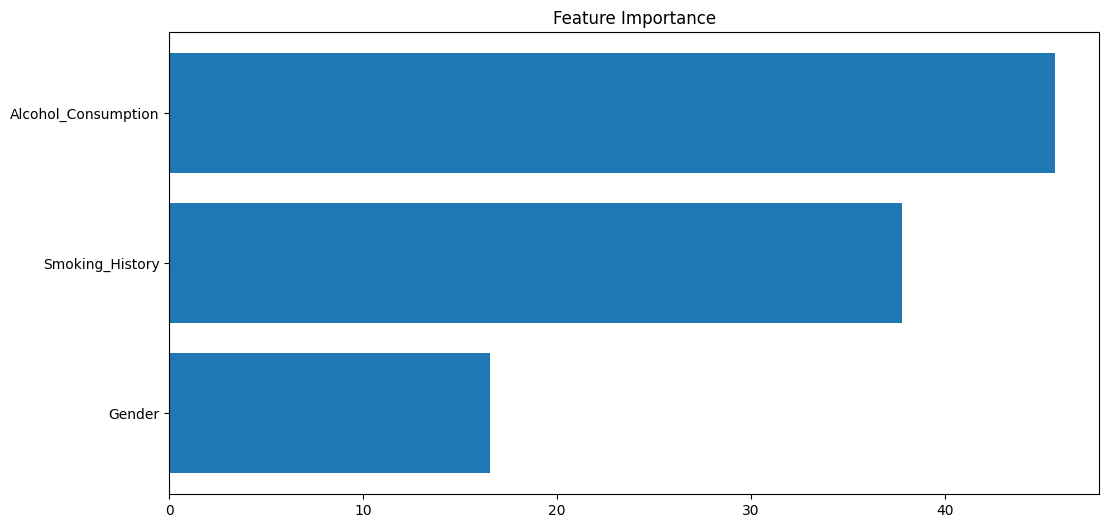

In [18]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [19]:
class_predictions = model.predict(X_test)
class_predictions.shape

(33500,)

In [20]:
print('Accuracy - ',accuracy_score(class_predictions,Y_test))
print('Precision - ',precision_score(class_predictions,Y_test))
print('Recall - ',recall_score(class_predictions,Y_test))

Accuracy -  0.600865671641791
Precision -  1.0
Recall -  0.600865671641791


In [21]:
#мдоель номер 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [22]:
model2 = CatBoostClassifier(iterations=120, depth=12, learning_rate=0.3, cat_features=cat_features,
                           loss_function='Logloss', custom_metric=['Accuracy'], random_seed=42)

In [23]:
model2.fit(X_train, Y_train, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6829427	total: 11.7ms	remaining: 1.39s
1:	learn: 0.6779173	total: 21.3ms	remaining: 1.26s
2:	learn: 0.6754208	total: 32ms	remaining: 1.25s
3:	learn: 0.6741897	total: 41.2ms	remaining: 1.19s
4:	learn: 0.6735758	total: 52.2ms	remaining: 1.2s
5:	learn: 0.6732744	total: 61.9ms	remaining: 1.18s
6:	learn: 0.6731259	total: 71ms	remaining: 1.15s
7:	learn: 0.6730511	total: 81.2ms	remaining: 1.14s
8:	learn: 0.6730152	total: 90.8ms	remaining: 1.12s
9:	learn: 0.6729974	total: 99.8ms	remaining: 1.1s
10:	learn: 0.6729879	total: 110ms	remaining: 1.09s
11:	learn: 0.6729836	total: 120ms	remaining: 1.08s
12:	learn: 0.6729811	total: 131ms	remaining: 1.08s
13:	learn: 0.6729801	total: 140ms	remaining: 1.06s
14:	learn: 0.6729795	total: 151ms	remaining: 1.05s
15:	learn: 0.6729791	total: 161ms	remaining: 1.05s
16:	learn: 0.6729789	total: 172ms	remaining: 1.04s
17:	learn: 0.6729789	total: 183ms	remaining: 1.04s
18:	learn: 0.6729788	total: 195ms	remaining: 1.04s
19:	learn: 0.6729788	total: 206ms	rem

In [24]:
model2.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Alcohol_Consumption,47.663670
1,Smoking_History,44.404226
2,Gender,7.932104


Text(0.5, 1.0, 'Feature Importance')

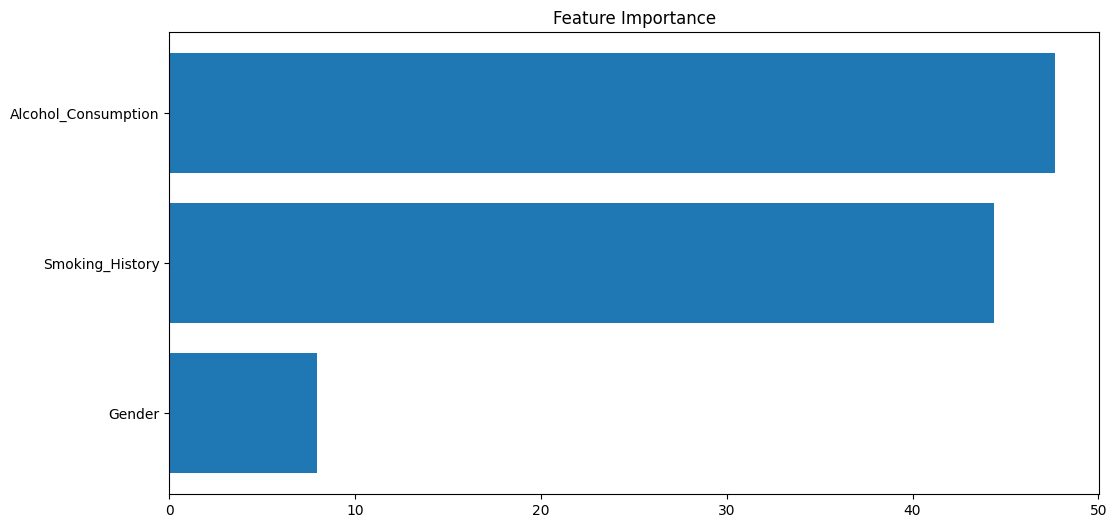

In [25]:
feature_importance = model2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [26]:
class_predictions = model2.predict(X_test)
class_predictions.shape

(50250,)

In [27]:
print('Accuracy - ',accuracy_score(class_predictions,Y_test))
print('Precision - ',precision_score(class_predictions,Y_test))
print('Recall - ',recall_score(class_predictions,Y_test))

Accuracy -  0.5987462686567164
Precision -  1.0
Recall -  0.5987462686567164
